1. Import packages

>tensorflow: TensorFlow is an open-source machine learning framework developed by Google. Some common use cases include:

-Creating tensors and performing operations on them using TensorFlow's computational graph.

-Building and training deep learning models using high-level APIs like Keras.

-Implementing custom machine learning algorithms using TensorFlow's lower-level APIs.

-Loading and preprocessing data for machine learning tasks.

-Evaluating and deploying trained models.

>keras: keras is a high-level neural networks API that is integrated into TensorFlow. It provides a user-friendly interface to define, configure, and train deep learning models.
  This includes the ability to define models using the Sequential API, create layers such as Dense, Conv2D, and LSTM, apply various activation functions, compile models with loss functions and optimizers, and train models using methods like fit.

Once you have imported keras from tensorflow, you can use its functionalities to build and train neural networks for various tasks like classification, regression, image recognition, and natural language processing.

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras #keras is a high-level neural networks API that is integrated into TensorFlow. It provides a user-friendly interface to define, configure, and train deep learning models.
from keras.models import Sequential, load_model #The Sequential class is a linear stack of layers in a neural network model. It allows you to build a neural network by stacking layers on top of each other.
from keras.layers import Dense #The Dense class represents a fully connected layer in a neural network. It is the most common type of layer used in neural networks and is responsible for performing mathematical operations on the input data.
import matplotlib.pyplot as plt

%matplotlib inline

2. Neural Networks

2.1 Problem statement

Use a neural network to recognize two handwritten digits, zero and one

2.2 Dataset 

The dataset contains 1000 training examples of handwritten digits, here limited to zero and one

Each training example is a 20-pixal x 20-pixel grayscale image of the digit

 -Each pixel is represented by a floating point numper
 
 -20 by 20 grud of pixels is "unrolled" into a 400-dimensional vector
 
 -Each training example becomes a single row in our data matrix X

 -this give us a 1000x400 matrix

The second part of the training set is a 1000 x 1 dimensional vector y that contains labels for the training set
 
 y = 0 if the image is of the digit 0, y = 1 if the image is of the digit 1.

In [25]:
def load_data():
    X=np.load("data/X.npy")
    y=np.load("data/y.npy")
    X=X[0:1000]
    y=y[0:1000] #The purpose of slicing the arrays in this code snippet is to limit the dataset size to the first 1000 samples, potentially for faster testing or prototyping purposes.
    return X,y

In [26]:
X,y=load_data()

In [27]:
print('The first element of X is:',X[0])

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [28]:
print('The first element of y is:', y[0,0])
print('The last element of y is:', y[-1,0])

The first element of y is: 0
The last element of y is: 1


In [29]:
#Check the dimensions of the variavles
print('The shape of X is:'+str(X.shape))
print('The shape of y is:'+str(y.shape))

The shape of X is:(1000, 400)
The shape of y is:(1000, 1)


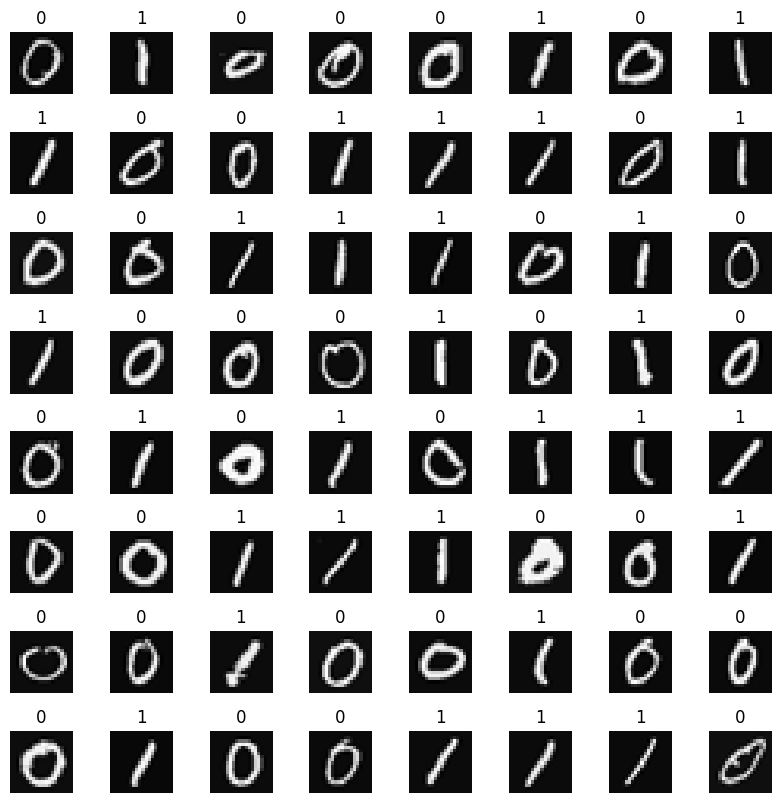

In [30]:
#Visualize the Data

m,n=X.shape

fig,axes=plt.subplots(8,8,figsize=(8,8)) 
fig.tight_layout(pad=0.1) #defines the distance between figures

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index=np.random.randint(m) #This line generates a random integer (random_index) between 0 and the number of samples (m). This is typically used to select a random data point from the dataset.
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped=X[random_index].reshape((20,20)).T # This line selects the data point at the randomly generated index (random_index) from the input data (X). The reshape() function is used to reshape the data point into a 20x20 matrix. The .T at the end performs a transpose operation, flipping the matrix along its diagonal.

    #Display image
    ax.imshow(X_random_reshaped,cmap='gray') #This line displays the reshaped and transposed data point (X_random_reshaped) in the current subplot (ax). The imshow() function is used to visualize the matrix as an image. The cmap='gray' parameter sets the colormap to grayscale, indicating that the image will be displayed in black and white.

    #Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off() #take the axis off the plot


>fig,axes=plt.subplots(8,8,figsize=(8,8)): 
This line creates a figure (fig) and an array of subplots (axes). The subplots() function is called with the parameters 8 and 8, indicating that the grid of subplots will have 8 rows and 8 columns. 

The figsize parameter specifies the size of the figure in inches, where (8, 8) indicates a width and height of 8 inches. The resulting figure and subplots are assigned to the variables fig and axes, respectively.

>fig.tight_layout(pad=0.1): This line adjusts the spacing between the subplots to optimize their arrangement. The tight_layout() function automatically adjusts the positions of axes and labels within the figure, preventing overlap.

 The pad parameter specifies the padding between the subplots, and a value of 0.1 indicates a padding of 0.1 inches. By calling tight_layout(), the spacing between subplots is optimized to minimize any overlaps or excessive gaps.


In [31]:
model=Sequential(
    [
        tf.keras.Input(shape=(400,)),
        tf.keras.layers.Dense(25,activation="sigmoid"),
        tf.keras.layers.Dense(15,activation="sigmoid"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ], name="my_model"
)

In [32]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


Explanation of the output:

In the dense layer, the output shape is (None, 25) which means it has 25 neurons. The total number of parameters in this layer is calculated as 25 (neurons) * 400 (input shape) + 25 (biases) = 10,025. 

Similarly, for the dense_1 layer, the output shape is (None, 15), and it has 15 * 25 + 15 = 390 parameters.

The last dense_2 layer has an output shape of (None, 1) because it is the final output layer of the network, responsible for binary classification (0 or 1). It has 1 * 15 + 1 = 16 parameters.